In [28]:
import numpy as np
import matplotlib.pyplot as plt

time_series = np.linspace(1, 10, 50)
phi = np.linspace(np.pi/6, np.pi/3, 50)
L = 1

# assume v is constant
v = 1

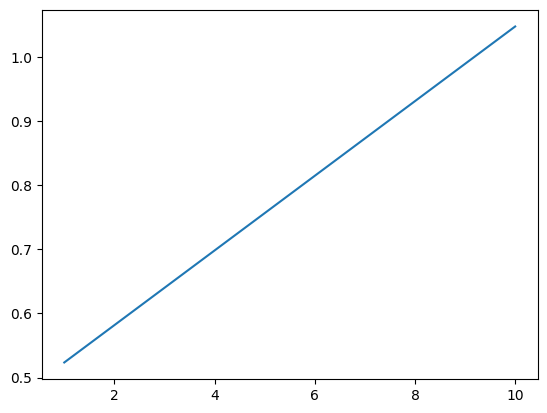

In [29]:
plt.plot(time_series, phi)

In [30]:
R = L / np.tan(phi)

omega = v / R

theta = omega * time_series # dependencies: omega

x_ref = R * np.cos(theta) # dependencies: R,  theta
y_ref = R * np.sin(theta) # dependencies: R,  theta
theta_ref = np.arctan(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
theta_ref = np.append(theta_ref, theta_ref[-1])

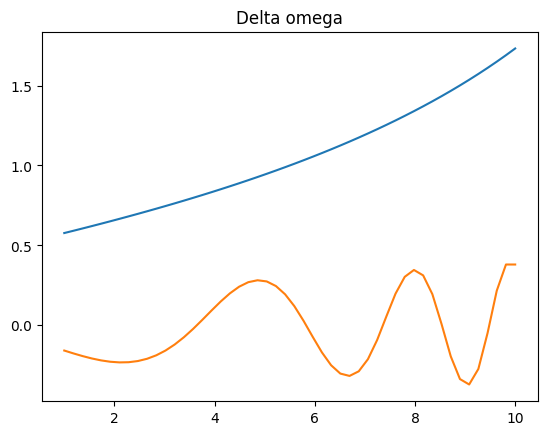

In [49]:
plt.title("Delta omega")
plt.plot(time_series, omega)
plt.plot(time_series, theta_ref)

In [32]:
# theta_ref
x_initial = -3
y_initial = 3

x_ref = x_ref + (x_initial - x_ref[0])
y_ref = y_ref + (y_initial - y_ref[0])

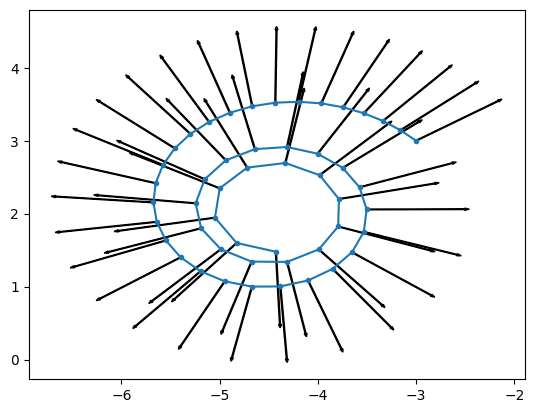

In [39]:
plt.plot(x_ref, y_ref, ".-")

for i, (x, y) in enumerate(zip(x_ref, y_ref)):
    if i >= len(theta_ref):
        break

    plt.arrow(x, y, np.cos(theta[i]), np.sin(theta[i]), width=0.01)

In [34]:
class Test:
    def __init__(self) -> None:
        self.huy = 0

a = Test()
hasattr(a, "huy")

True

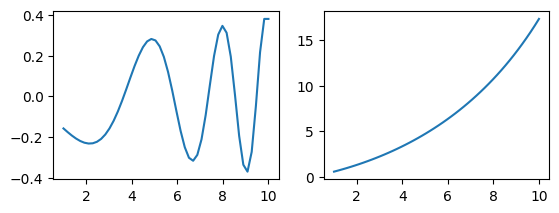

In [35]:
theta_ref = np.arctan(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
theta_ref = np.append(theta_ref, theta_ref[-1])

plt.subplot(221)
plt.plot(time_series, theta_ref)
plt.subplot(222)
plt.plot(time_series, theta)

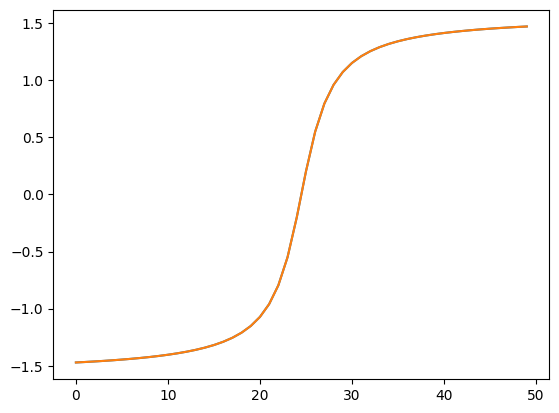

In [36]:

x = np.linspace(-10, 10, 50)
x
plt.plot(np.arctan(x))
plt.plot(np.arctan2(x, 1))

In [37]:
np.arcta

AttributeError: module 'numpy' has no attribute 'arcta'